In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [2]:
df=pd.read_csv(r"C:\Users\nevta\Desktop\Datasets\insurance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.duplicated().any()

True

In [5]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [6]:
df=df.drop_duplicates(keep="first")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [9]:

smoke_filter=df.groupby(df["smoker"]).mean()

smoke_filter

,age,bmi,children,charges
smoker,,,,
no,39.404516,30.651853,1.091251,8440.660307
yes,38.514599,30.708449,1.113139,32050.231832


<AxesSubplot:xlabel='smoker', ylabel='charges'>

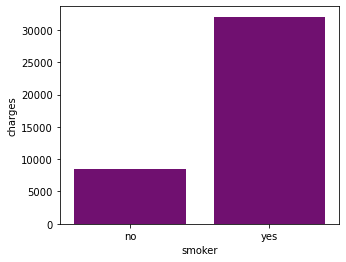

In [10]:
plt.figure(figsize=(5,4))
sns.barplot(data=smoke_filter.reset_index(),x="smoker",y="charges",color="purple")

In [11]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<AxesSubplot:xlabel='region', ylabel='charges'>

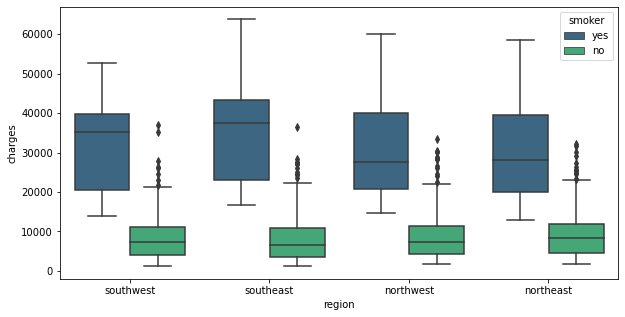

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x="region",y="charges",hue="smoker",data=df,palette='viridis')

Regions do not affect charges,but we will not ignore it. Also, smoker is a essential feature for us. Hence, lets deal with outlier.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

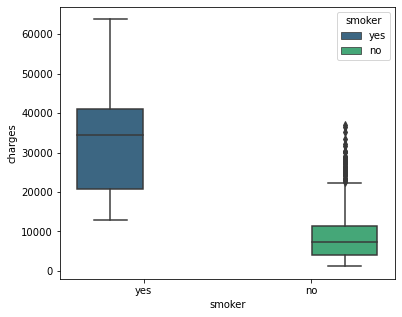

In [13]:
plt.figure(figsize=(6,5))
sns.boxplot(x="smoker",y="charges",hue="smoker",data=df,palette='viridis',fliersize=5)

In [14]:
filter=df.loc[(df["smoker"]=="no" ) & (df["charges"] > 25000) & (df["region"]=="southeast")]
filter

,age,sex,bmi,children,smoker,region,charges
138,54,female,31.90,3,no,southeast,27322.73386
219,24,female,23.21,0,no,southeast,25081.76784
289,52,male,26.40,3,no,southeast,25992.82104
379,62,male,31.46,1,no,southeast,27000.98473
443,59,female,36.52,1,no,southeast,28287.89766
516,20,male,35.31,1,no,southeast,27724.28875
539,53,male,31.35,0,no,southeast,27346.04207
1012,61,female,33.33,4,no,southeast,36580.28216
1142,52,female,24.86,0,no,southeast,27117.99378


In [15]:
filterwest=df.loc[(df["smoker"]=="no" ) & (df["charges"] > 25000) & (df["region"]=="southwest")]
filterwest


,age,sex,bmi,children,smoker,region,charges
242,55,female,26.8,1,no,southwest,35160.13457
688,47,female,24.1,1,no,southwest,26236.57997
770,61,male,36.1,3,no,southwest,27941.28758
876,49,female,27.1,1,no,southwest,26140.36030
1206,59,female,34.8,2,no,southwest,36910.60803


In [16]:
filter.corr()

,age,bmi,children,charges
age,1.000000,0.225659,0.382131,0.383916
bmi,0.225659,1.000000,0.271648,0.457465
children,0.382131,0.271648,1.000000,0.611576
charges,0.383916,0.457465,0.611576,1.000000


Three feature is highly correlated, so there are high chances to have outliers.

In [17]:
filter.describe()

,age,bmi,children,charges
count,9.000000,9.000000,9.000000,9.000000
mean,48.555556,30.482222,1.444444,28050.534654
std,15.557242,4.646912,1.509231,3334.747426
min,20.000000,23.210000,0.000000,25081.767840
25%,52.000000,26.400000,0.000000,27000.984730
50%,53.000000,31.460000,1.000000,27322.733860
75%,59.000000,33.330000,3.000000,27724.288750
max,62.000000,36.520000,4.000000,36580.282160


In [18]:
filter[filter["charges"]>=30000] 

,age,sex,bmi,children,smoker,region,charges
1012,61,female,33.33,4,no,southeast,36580.28216


Although she has high charges, she is non-smoker. All other feauture have effects for "charges". Hence, I will not drop any rows.

In [19]:
filterwest.corr()

,age,bmi,children,charges
age,1.000000,0.919819,0.843221,0.559660
bmi,0.919819,1.000000,0.926785,0.345822
children,0.843221,0.926785,1.000000,0.073645
charges,0.559660,0.345822,0.073645,1.000000


"Age" and "bmi" are highly correlated, so there are high chances to have outliers. 

In [20]:
filterwest.describe()

,age,bmi,children,charges
count,5.00000,5.000000,5.000000,5.000000
mean,54.20000,29.780000,1.600000,30477.794090
std,6.09918,5.326068,0.894427,5160.922929
min,47.00000,24.100000,1.000000,26140.360300
25%,49.00000,26.800000,1.000000,26236.579970
50%,55.00000,27.100000,1.000000,27941.287580
75%,59.00000,34.800000,2.000000,35160.134570
max,61.00000,36.100000,3.000000,36910.608030


In [21]:
filterwest[filterwest["charges"]>=30000] 

,age,sex,bmi,children,smoker,region,charges
242,55,female,26.8,1,no,southwest,35160.13457
1206,59,female,34.8,2,no,southwest,36910.60803


I am gonna drop first row because it has high charges although she has not sufficient feature to affect charges.

In [22]:
df=df.drop(axis=1,index=[242])


To sum up, although there are edge points, most of them are not sufficient to be outlier

<AxesSubplot:xlabel='charges', ylabel='bmi'>

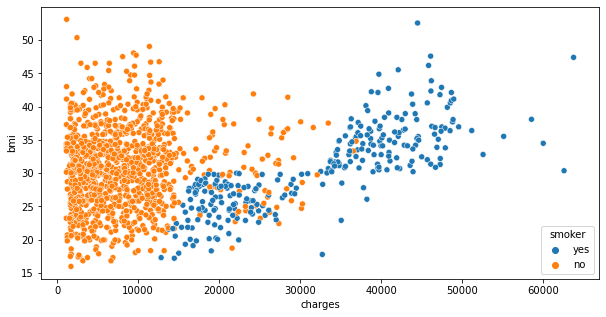

In [23]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="charges",y="bmi",hue="smoker",data=df)

<AxesSubplot:xlabel='charges', ylabel='bmi'>

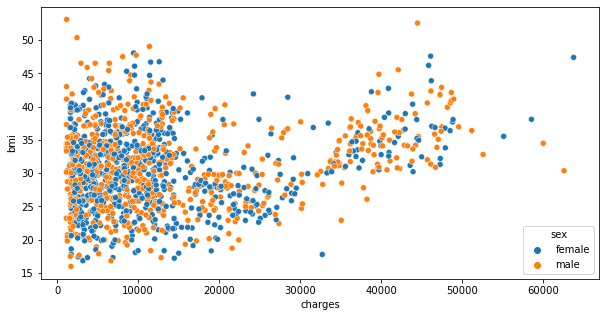

In [24]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="charges",y="bmi",hue="sex",data=df)

<AxesSubplot:xlabel='charges', ylabel='age'>

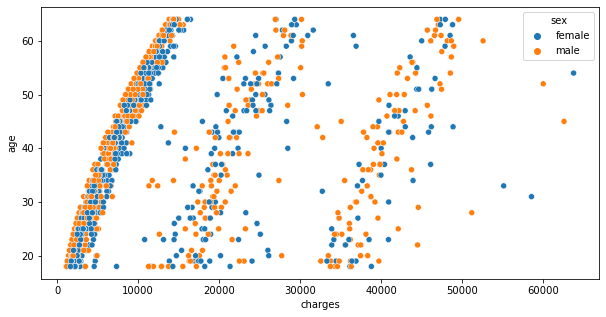

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="charges",y="age",hue="sex",data=df)

Sex is not a distinctive feature while Bmi is a distinctive. Also, age is right slop, which has low correlation. Lets focus on bmi.

<AxesSubplot:xlabel='charges', ylabel='bmi'>

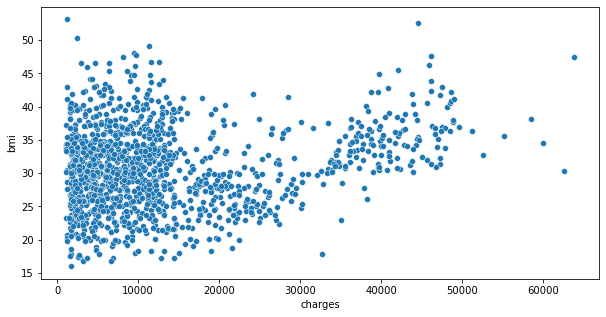

In [26]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="charges",y="bmi",data=df)

In [27]:
df["bmi"].describe()

count    1336.000000
mean       30.666344
std         6.101836
min        15.960000
25%        26.272500
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

In [28]:
filter2=df[(df["bmi"]>45) & (df["charges"]<10000)]
filter2

,age,sex,bmi,children,smoker,region,charges
286,46,female,48.07,2,no,northeast,9432.9253
401,47,male,47.52,1,no,southeast,8083.9198
454,32,male,46.53,2,no,southeast,4686.3887
582,39,male,45.43,2,no,southeast,6356.2707
660,37,male,46.53,3,no,southeast,6435.6237
847,23,male,50.38,1,no,southeast,2438.0552
930,26,male,46.53,1,no,southeast,2927.0647
941,50,female,46.09,1,no,southeast,9549.5651
1024,47,female,45.32,1,no,southeast,8569.8618
1088,52,male,47.74,1,no,southeast,9748.9106


If the age and number of children are low  it may cause to low charges.

In [29]:
filter2[(filter2["age"]<30) & (filter2["children"]<=1)]

,age,sex,bmi,children,smoker,region,charges
847,23,male,50.38,1,no,southeast,2438.0552
930,26,male,46.53,1,no,southeast,2927.0647
1317,18,male,53.13,0,no,southeast,1163.4627


In [30]:
df=df.drop(axis=1,index=[847,930,1317])

In [31]:
df[(df["charges"]>30000) & (df["bmi"]<20)]

,age,sex,bmi,children,smoker,region,charges
128,32,female,17.765,2,yes,northwest,32734.1863


She is also  outlier for the bmi feature.

In [32]:
df=df.drop(index=[128])


<AxesSubplot:xlabel='charges', ylabel='bmi'>

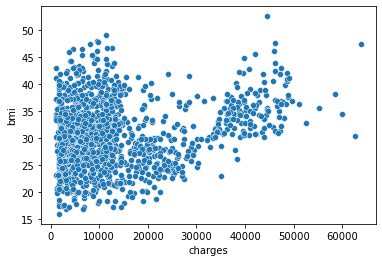

In [33]:
sns.scatterplot(x="charges",y="bmi",data=df)

Therefore, we have, first, detected outliers. Then,we have dropped it. 

<AxesSubplot:xlabel='region', ylabel='charges'>

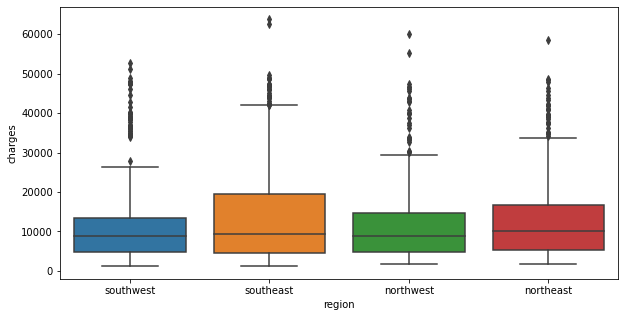

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x="region", y="charges")

<AxesSubplot:xlabel='sex', ylabel='charges'>

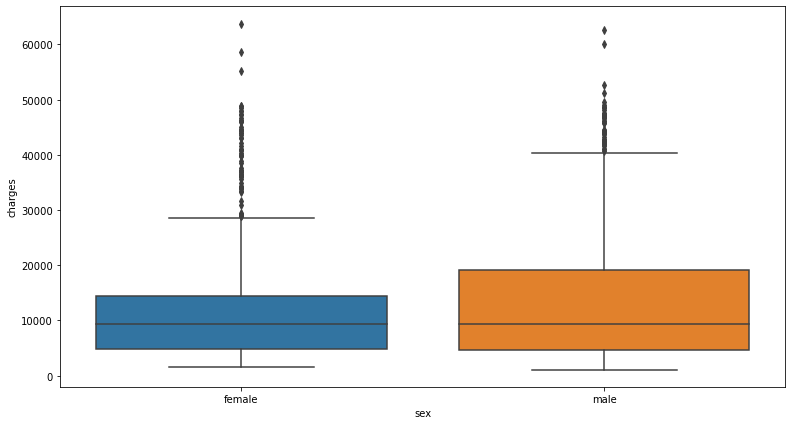

In [35]:
plt.figure(figsize=(13,7))
sns.boxplot(data=df,x="sex", y="charges")

In [36]:
df.pivot_table(index=["region","sex"],values="charges",aggfunc="mean")

charges
region    sex                 
northeast female  12953.203151
          male    13854.005374
northwest female  12355.610790
          male    12421.085553
southeast female  13499.669243
          male    16100.640125
southwest female  11126.052734
          male    13412.883576

<AxesSubplot:xlabel='charges', ylabel='region'>

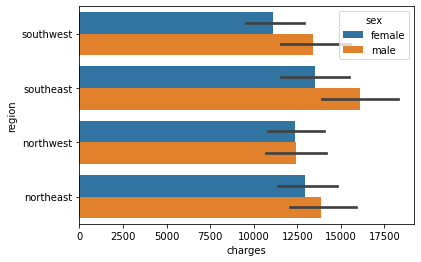

In [37]:
sns.barplot(x="charges",y="region",data=df,hue="sex")

Southeast's sex and region feature have high charges, and there are more charge differences in southwest and southeast in terms of of the sex. Hence, I will create southeast feature and southeast southwest sex feature

In [38]:
a=pd.get_dummies(df["region"])
a

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [39]:
df=pd.concat([df,a.drop(columns=["northeast","northwest","southwest"])],axis=1)
df


,age,sex,bmi,children,smoker,region,charges,southeast
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,1
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [40]:
filter=df[df["region"].isin(["southeast","southwest"])]
filter


,age,sex,bmi,children,smoker,region,charges,southeast
0,19,female,27.90,0,yes,southwest,16884.92400,0
1,18,male,33.77,1,no,southeast,1725.55230,1
2,28,male,33.00,3,no,southeast,4449.46200,1
5,31,female,25.74,0,no,southeast,3756.62160,1
6,46,female,33.44,1,no,southeast,8240.58960,1
...,...,...,...,...,...,...,...,...
1330,57,female,25.74,2,no,southeast,12629.16560,1
1331,23,female,33.40,0,no,southwest,10795.93733,0
1332,52,female,44.70,3,no,southwest,11411.68500,0
1335,18,female,36.85,0,no,southeast,1629.83350,1


In [41]:
filter1_done=pd.get_dummies(filter["sex"])
filter1_done

,female,male
0,1,0
1,0,1
2,0,1
5,1,0
6,1,0
...,...,...
1330,1,0
1331,1,0
1332,1,0
1335,1,0


In [42]:
df=pd.merge(df,filter1_done, left_index=True, right_index=True,how="outer" )
df

,age,sex,bmi,children,smoker,region,charges,southeast,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,0,1.0,0.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0.0,1.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0.0,1.0
3,33,male,22.705,0,no,northwest,21984.47061,0,NaN,NaN
4,32,male,28.880,0,no,northwest,3866.85520,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,NaN,NaN
1334,18,female,31.920,0,no,northeast,2205.98080,0,NaN,NaN
1335,18,female,36.850,0,no,southeast,1629.83350,1,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,1.0,0.0


In [43]:
df=df.fillna(0)
df

,age,sex,bmi,children,smoker,region,charges,southeast,female,male
0,19,female,27.900,0,yes,southwest,16884.92400,0,1.0,0.0
1,18,male,33.770,1,no,southeast,1725.55230,1,0.0,1.0
2,28,male,33.000,3,no,southeast,4449.46200,1,0.0,1.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,1,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,1.0,0.0


In [44]:
df.corr()

,age,bmi,children,charges,southeast,female,male
age,1.000000,0.119743,0.040852,0.296500,-0.007655,0.003910,-0.005543
bmi,0.119743,1.000000,0.016995,0.211890,0.261509,0.076850,0.186223
children,0.040852,0.016995,1.000000,0.066052,-0.021962,-0.004710,0.003484
charges,0.296500,0.211890,0.066052,1.000000,0.079010,-0.043754,0.077484
southeast,-0.007655,0.261509,-0.021962,0.079010,1.000000,0.326434,0.351126
female,0.003910,0.076850,-0.004710,-0.043754,0.326434,1.000000,-0.346080
male,-0.005543,0.186223,0.003484,0.077484,0.351126,-0.346080,1.000000


In [45]:
df["children"].value_counts()

0    572
1    321
2    239
3    157
4     25
5     18
Name: children, dtype: int64

In [46]:
df.describe()

,age,bmi,children,charges,southeast,female,male
count,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000,1332.000000
mean,39.253754,30.632455,1.096096,13273.094988,0.271021,0.252252,0.262012
std,14.038860,6.029752,1.207197,12094.979550,0.444654,0.434468,0.439894
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.272500,0.000000,4750.065725,0.000000,0.000000,0.000000
50%,39.000000,30.380000,1.000000,9388.753650,0.000000,0.000000,0.000000
75%,51.000000,34.618750,2.000000,16604.302645,1.000000,1.000000,1.000000
max,64.000000,52.580000,5.000000,63770.428010,1.000000,1.000000,1.000000


There is low correlation between charges and children. Hence, I will categorize it

In [47]:
bins=[-1,1,3,5]
x=pd.cut(df["children"],bins=bins,labels=["less_child","average_child","overavg_child"])
x1=pd.get_dummies(x,drop_first=True)
x1


,average_child,overavg_child
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
1333,1,0
1334,0,0
1335,0,0
1336,0,0


In [48]:
df=pd.concat([df,x1], axis=1)

df

,age,sex,bmi,children,smoker,region,charges,southeast,female,male,average_child,overavg_child
0,19,female,27.900,0,yes,southwest,16884.92400,0,1.0,0.0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,0.0,1.0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0.0,1.0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,0.0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,0.0,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0.0,0.0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,1.0,0.0,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,1.0,0.0,0,0


In [49]:
dunny=pd.get_dummies(df["smoker"],drop_first="True")
dunny

,yes
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [50]:
df=pd.concat([df,dunny], axis=1)

df

,age,sex,bmi,children,smoker,region,charges,southeast,female,male,average_child,overavg_child,yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1.0,0.0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0.0,1.0,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0.0,1.0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,0.0,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,0.0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0.0,0.0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,1.0,0.0,0,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,1.0,0.0,0,0,0


In [51]:
df=df.rename(columns={"yes":"Smoker","female":"southfem","male":"soutmale",})
df

,age,sex,bmi,children,smoker,region,charges,southeast,southfem,soutmale,average_child,overavg_child,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,0,1.0,0.0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0.0,1.0,0,0,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0.0,1.0,1,0,0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,0.0,0,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,0.0,1,0,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0.0,0.0,0,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,1.0,0.0,0,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,1.0,0.0,0,0,0


In [52]:
df.corr()

,age,bmi,children,charges,southeast,southfem,soutmale,average_child,overavg_child,Smoker
age,1.000000,0.119743,0.040852,0.296500,-0.007655,0.003910,-0.005543,0.048750,-0.021765,-0.025879
bmi,0.119743,1.000000,0.016995,0.211890,0.261509,0.076850,0.186223,0.028332,0.000334,0.010395
children,0.040852,0.016995,1.000000,0.066052,-0.021962,-0.004710,0.003484,0.700908,0.502873,0.005804
charges,0.296500,0.211890,0.066052,1.000000,0.079010,-0.043754,0.077484,0.100472,-0.023302,0.788429
southeast,-0.007655,0.261509,-0.021962,0.079010,1.000000,0.326434,0.351126,-0.023371,-0.006249,0.071178
southfem,0.003910,0.076850,-0.004710,-0.043754,0.326434,1.000000,-0.346080,-0.026065,0.021058,-0.050809
soutmale,-0.005543,0.186223,0.003484,0.077484,0.351126,-0.346080,1.000000,-0.006562,0.016745,0.086580
average_child,0.048750,0.028332,0.700908,0.100472,-0.023371,-0.026065,-0.006562,1.000000,-0.118800,0.048168
overavg_child,-0.021765,0.000334,0.502873,-0.023302,-0.006249,0.021058,0.016745,-0.118800,1.000000,-0.050645
Smoker,-0.025879,0.010395,0.005804,0.788429,0.071178,-0.050809,0.086580,0.048168,-0.050645,1.000000


# Machine Learning

In [53]:
y=df["charges"]
X=df.drop(columns=["sex","region","smoker","charges","children","southfem","soutmale"])

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
scaler=StandardScaler()

In [58]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [59]:
from sklearn.linear_model import ElasticNet

In [60]:
model=ElasticNet()

In [61]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
grid_model=GridSearchCV(estimator=model ,param_grid=param_grid, scoring="neg_mean_squared_error", cv=5, verbose=1)
grid_model

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [64]:
grid_model.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [65]:
grid_model.best_estimator_

ElasticNet(alpha=50, l1_ratio=1)

In [66]:
y_pred = grid_model.predict(scaled_X_test)

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [68]:
mean_absolute_error(y_test,y_pred)

4159.4446656906985

In [69]:
np.sqrt(mean_squared_error(y_test,y_pred))

5770.411677431271

In [70]:
np.mean(df['charges'])

13273.094988129882

There are about %70 percentage accuracy

sns.scatterplot(x=y_test, y=residual)

70 percent accuracy did not satisfy me, but It is not bad, although there is not high correlated feature.